### Bonus Assignment 3

#### 1 | Get the shapefiles

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
shx = gpd.read_file("\...\data\raw\-roads.shx")

In [3]:
shx

geometry
0       LINESTRING (90.42258 23.79758, 90.42238 23.798...
1       LINESTRING (90.41891 23.79768, 90.42034 23.798...
2       LINESTRING (90.41857 23.79918, 90.41941 23.799...
3       LINESTRING (90.41926 23.80001, 90.42059 23.800...
4       LINESTRING (90.42049 23.80098, 90.42088 23.801...
...                                                   ...
112709  LINESTRING (89.23653 25.76315, 89.23796 25.763...
112710  LINESTRING (92.16661 22.66153, 92.16673 22.662...
112711  LINESTRING (90.36810 23.80867, 90.36771 23.808...
112712  LINESTRING (90.37306 23.78523, 90.37371 23.78539)
112713  LINESTRING (90.36516 23.80940, 90.36439 23.80941)

[112714 rows x 1 columns]

In [4]:
from shapely.geometry import Polygon

# polys = gpd.GeoSeries(Polygon([(90.18,22.27), (90.18, 23.68), (92.07, 23.68), (92.07, 22.27)]))
polys = gpd.GeoSeries(Polygon([(90.18,22.27), (90.18, 25.13), (92.07, 25.13), (92.07, 22.27)]))

In [5]:
polysgdf = gpd.GeoDataFrame({'geometry': polys, 'df1':[1]})

<AxesSubplot:>

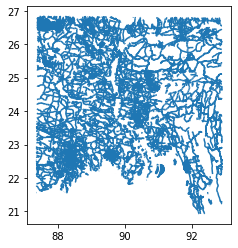

In [6]:
shx.plot()

In [7]:
clipped_gdf = gpd.clip(shx, polysgdf)

<AxesSubplot:>

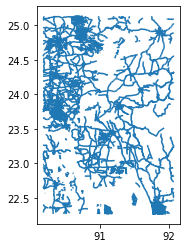

In [8]:
clipped_gdf.plot()

#### 2 | Find out where the intersections are in real life

In [27]:
points = []
for i in range(len(clipped_gdf)):
    # Iterate over all rows
    for j in range(len(clipped_gdf)):
        if j > i: 
            if clipped_gdf.geometry[i].touches(clipped_gdf.geometry[j]) == True:
                point = clipped_gdf.geometry[i].intersection(clipped_gdf.geometry[j])
                if point.type == "Point":
                    point_coor = point.x, point.y
                    points.append(point_coor)
                else: 
                    try:
                        point_coor = [(p.x, p.y) for p in point]
                        points.append(point_coor)
                    except:
                        print(point)
                        break
                    #point_coor = [(p.x, p.y) for p in point]
                #points.append(point_coor)
    
    if i%1000 == 0:
        print(i)
            
print("loop has ended.")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
loop has ended.


#### Safe the intersection points to a csv

In [32]:
df1 = pd.DataFrame(points)
df1.to_csv('\...\data\processed\points_shapefile_new.csv') 

### Compare to the model intersections

In [9]:
df_model = pd.read_csv("\...\data\processed\_N1_N2_plus_sideroads.csv")

In [10]:
df_model.head(10)

road       id  model_type condition   name        lat        lon  length  \
0   N1  1000000  sourcesink       NaN  SoSi1  23.706028  90.443333     0.0   
1   N1  1000001        link       NaN    NaN  23.702917  90.450417   814.0   
2   N1  1000002        link       NaN    NaN  23.702778  90.450472     8.0   
3   N1  1000003        link       NaN    NaN  23.702139  90.451972   178.0   
4   N1  1000004      bridge         A    NaN  23.698739  90.458861    11.3   
5   N1  1000005        link       NaN    NaN  23.697889  90.460583  1000.0   
6   N1  1000006        link       NaN    NaN  23.697361  90.461667   130.0   
7   N1  1000007        link       NaN    NaN  23.693833  90.469138   870.0   
8   N1  1000008        link       NaN    NaN  23.693611  90.478777  1000.0   
9   N1  1000009        link       NaN    NaN  23.693805  90.480527   175.0   

            bridge_name  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4  bridge at id 1000004  
5                   NaN  
6                   NaN  
7                   NaN  
8                   NaN  
9                   NaN

In [11]:
df_intersect_model = df_model[df_model["model_type"] == "intersection"]

In [12]:
df_intersect_model.head()

road       id    model_type condition name        lat        lon  length  \
132   N1  1000133  intersection       NaN  NaN  23.530805  90.781110   815.0   
156   N1  1000157  intersection       NaN  NaN  23.513111  90.870638    42.0   
157   N1  1000158  intersection       NaN  NaN  23.512667  90.871416   102.0   
208   N1  1000209  intersection       NaN  NaN  23.478972  91.117999    28.0   
209   N1  1000210  intersection       NaN  NaN  23.478972  91.118166    17.0   

    bridge_name  
132         NaN  
156         NaN  
157         NaN  
208         NaN  
209         NaN

In [13]:
gdf_intersections = gpd.GeoDataFrame(
    df_intersect_model, geometry=gpd.points_from_xy(df_intersect_model.lon, df_intersect_model.lat))

In [14]:
gdf_intersections.head()

road       id    model_type condition name        lat        lon  length  \
132   N1  1000133  intersection       NaN  NaN  23.530805  90.781110   815.0   
156   N1  1000157  intersection       NaN  NaN  23.513111  90.870638    42.0   
157   N1  1000158  intersection       NaN  NaN  23.512667  90.871416   102.0   
208   N1  1000209  intersection       NaN  NaN  23.478972  91.117999    28.0   
209   N1  1000210  intersection       NaN  NaN  23.478972  91.118166    17.0   

    bridge_name                   geometry  
132         NaN  POINT (90.78111 23.53080)  
156         NaN  POINT (90.87064 23.51311)  
157         NaN  POINT (90.87142 23.51267)  
208         NaN  POINT (91.11800 23.47897)  
209         NaN  POINT (91.11817 23.47897)

<AxesSubplot:>

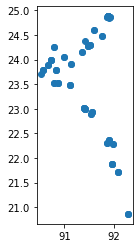

In [15]:
gdf_intersections.plot()

In [16]:
df_real = pd.read_csv('\...\data\processed\points_shapefile_new.csv') 

In [17]:
df_real = df_real.rename(columns = {'0':'lon', '1':'lat'})

In [18]:
found = df_real[df_real['lon'].str.contains(',')]
print(found.count())

Unnamed: 0    439
lon           439
lat           439
2               2
dtype: int64


In [19]:
lons = found.lon.str.split(',', expand=True)

In [20]:
lons = lons.rename(columns = {0:'lon', 1:'lat'})

In [21]:
lons.lon = lons.lon.str.strip("(")
lons.lat = lons.lat.str.strip(")")

In [22]:
lats = found.lat.str.split(',', expand=True)
lats = lats.rename(columns = {0:'lon', 1:'lat'})

In [23]:
lats.lon = lats.lon.str.strip("(")
lats.lat = lats.lat.str.strip(")")

In [24]:
real = pd.merge(lats,lons, how = 'outer')

In [25]:
# try without found
df_try = df_real[df_real['lon'].str.contains(',') == False]

In [26]:
real = pd.merge(real,df_try, how = 'outer' )

In [33]:
gdf_real = gpd.GeoDataFrame(
    real, geometry=gpd.points_from_xy(real.lon, real.lat))

gdf_real.head()

lon          lat  Unnamed: 0    2                   geometry
0  90.4113526   23.7963655         NaN  NaN  POINT (90.41135 23.79637)
1  90.4083024   23.8503278         NaN  NaN  POINT (90.40830 23.85033)
2  90.3902372   23.7579519         NaN  NaN  POINT (90.39024 23.75795)
3  90.3902063   23.7580547         NaN  NaN  POINT (90.39021 23.75805)
4   90.417387   23.7417764         NaN  NaN  POINT (90.41739 23.74178)

<AxesSubplot:>

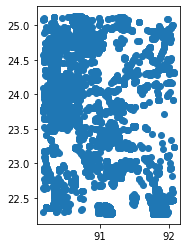

In [135]:
gdf_real.plot()

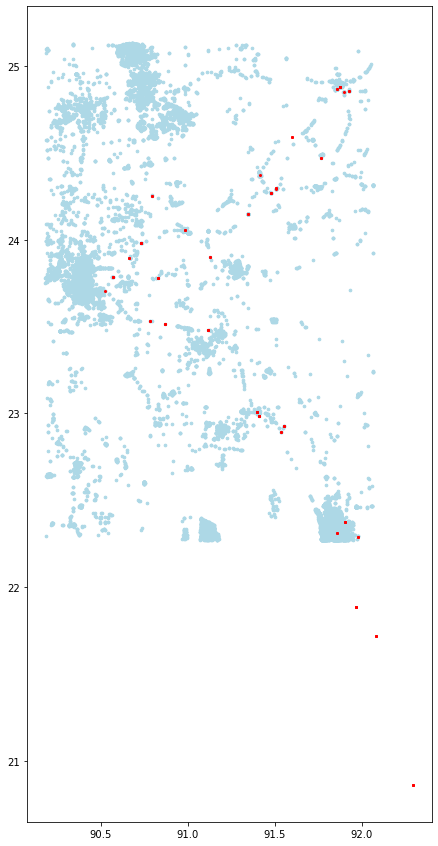

In [34]:
base = gdf_real.plot(color='lightblue', markersize = 7, figsize = (30,15))
gdf_intersections.plot(ax=base, marker='o', color='red', markersize=4);

In [40]:
same_points = pd.merge(df_intersect_model, real, on='geometry')

In [41]:
same_points

Empty DataFrame
Columns: [road, id, model_type, condition, name, lat_x, lon_x, length, bridge_name, geometry, lon_y, lat_y, Unnamed: 0, 2]
Index: []